## ML Test Scores

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('scores_data.csv')
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [6]:
df.head()

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


**No missing values in three rows**

In [15]:
df.describe()

,Batch,User_ID,Score
count,149,149,149
unique,3,149,8
top,AI_ELITE_7,uid_149,4 / 7
freq,53,1,40


### Cleaning score column

In [24]:
df["Score_Num"] = df['   Score   '].str.split("/").str[0].astype(int)
df.head()

,Batch,User_ID,Score,Score_Num
0,AI_ELITE_7,uid_149,6 / 7,6
1,AI_ELITE_7,uid_148,6 / 7,6
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
4,AI_ELITE_7,uid_145,4 / 7,4


In [22]:
print(df.columns)

Index(['Batch ', 'User_ID ', '   Score   '], dtype='object')


In [56]:
df['Batch '].value_counts()

Batch 
AI_ELITE_7    53
AI_ELITE_6    48
AI_ELITE_4    48
Name: count, dtype: int64

In [70]:
df.groupby('Batch ')['Score_Num'].mean().sort_values(ascending=False)

Batch 
AI_ELITE_7    5.056604
AI_ELITE_6    4.229167
AI_ELITE_4    3.791667
Name: Score_Num, dtype: float64

### Average score per batch

In [29]:
df.groupby("Batch ")["Score_Num"].mean()

Batch 
AI_ELITE_4    3.791667
AI_ELITE_6    4.229167
AI_ELITE_7    5.056604
Name: Score_Num, dtype: float64

### Score distribution

In [32]:
df["Score_Num"].value_counts().sort_index()

Score_Num
0     2
1     3
2    12
3    24
4    40
5    32
6    18
7    18
Name: count, dtype: int64

### Top Performers

In [35]:
df[df["Score_Num"] == df["Score_Num"].max()]

,Batch,User_ID,Score,Score_Num
2,AI_ELITE_7,uid_147,7 / 7,7
3,AI_ELITE_7,uid_146,7 / 7,7
5,AI_ELITE_7,uid_144,7 / 7,7
7,AI_ELITE_7,uid_142,7 / 7,7
15,AI_ELITE_7,uid_134,7 / 7,7
16,AI_ELITE_7,uid_133,7 / 7,7
17,AI_ELITE_7,uid_132,7 / 7,7
19,AI_ELITE_7,uid_130,7 / 7,7
24,AI_ELITE_7,uid_125,7 / 7,7
35,AI_ELITE_7,uid_114,7 / 7,7


In [37]:
df[df["Score_Num"] == df["Score_Num"].min()]


,Batch,User_ID,Score,Score_Num
68,AI_ELITE_6,uid_81,0 / 7,0
135,AI_ELITE_4,uid_14,0 / 7,0


## Univariate Analysis

### Score distribution

In [42]:
import matplotlib.pyplot as plt

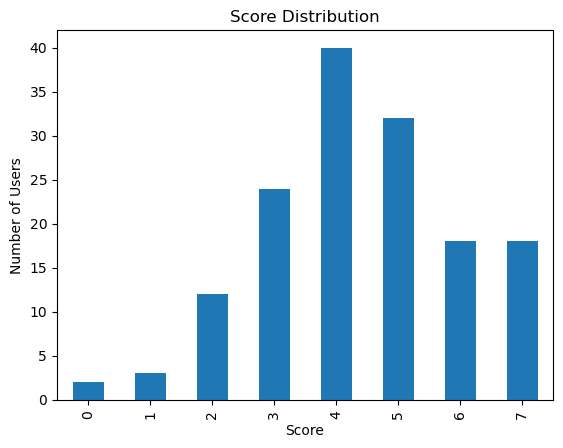

In [43]:
plt.figure()
df["Score_Num"].value_counts().sort_index().plot(kind="bar")
plt.xlabel("Score")
plt.ylabel("Number of Users")
plt.title("Score Distribution")
plt.show()

### Average score per batch

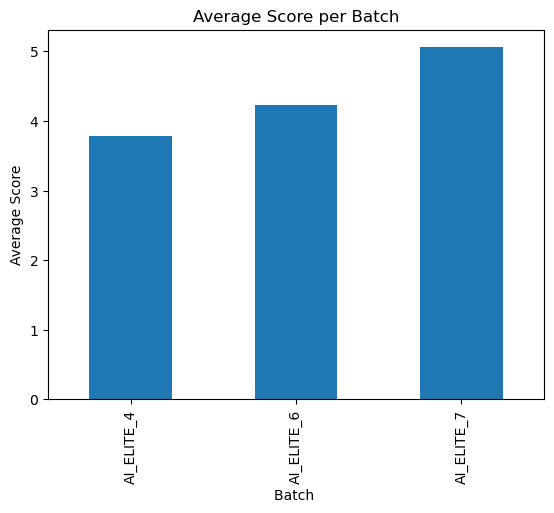

In [52]:
plt.figure()
df.groupby("Batch ")["Score_Num"].mean().plot(kind="bar")
plt.xlabel("Batch ")
plt.ylabel("Average Score")
plt.title("Average Score per Batch")
plt.show()

### Users per batch

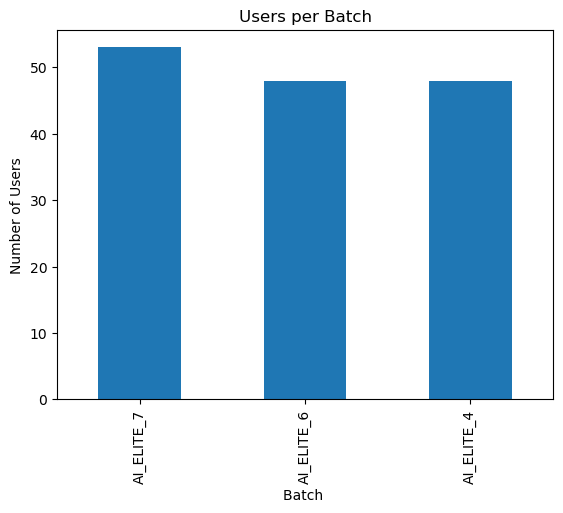

In [54]:
plt.figure()
df["Batch "].value_counts().plot(kind="bar")
plt.xlabel("Batch ")
plt.ylabel("Number of Users")
plt.title("Users per Batch")
plt.show()

In [73]:
import seaborn as sns

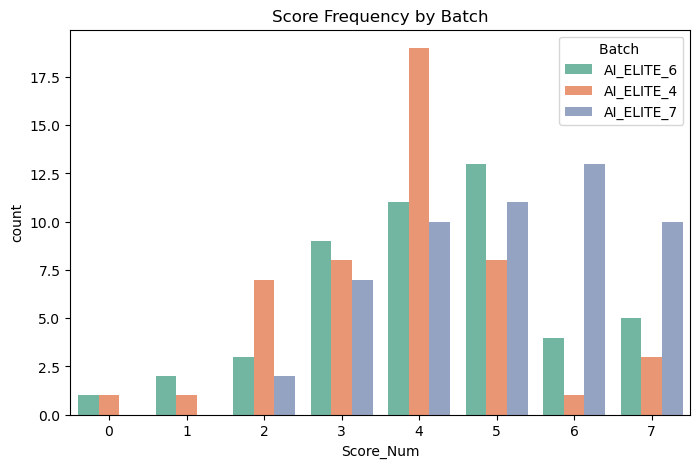

In [77]:
plt.figure(figsize = (8,5))
sns.countplot(x='Score_Num',hue='Batch ',data=df,palette='Set2')
plt.title('Score Frequency by Batch')
plt.show()

## Insights
### Performance
* AI_ELITE_7 has the highest number of users
* AI_ELITE_4 and AI_ELITE_6 have comparatively fewer users
### Average Performance
* AI_ELITE_7 has the highest average score
* AI_ELITE_4 has the lowest average score

* Most users scored mid range,that means assessment had a balanced difficulty level